# Load DFT data into a more manageable format

#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ase
from ase.db import connect
import sys
import os

In [2]:
# Attach Jacks formic acid data
formic_acid_data_path = "../Experiments/AgAuCuPdPt_data/1_databases/relaxed/"

### Sort through data

In [3]:
single_element_dbs = []
HEA_dbs = []

for filename in os.listdir(formic_acid_data_path):
    if filename[-3:] == ".db":
        if filename[0:14] == "single_element":
            single_element_dbs.append(filename)
        if filename[0] == "H" or filename[0] == "C":
            HEA_dbs.append(filename)

In [4]:
print(f"Single element: \n{single_element_dbs}\n")
print(f"HEA: \n{HEA_dbs}")

Single element: 
['single_element_H_out.db', 'single_element_COOH_COH_adsorbed_out.db', 'single_element_slabs.db', 'single_element_COOH_H_CO_adsorbed_out.db', 'single_element_COOH_C_adsorbed_out.db', 'single_element_COOH_CO_adsorbed_out.db', 'single_element_CO_out.db', 'single_element_CO.db', 'single_elements_COOH_CO_adsorbed_out.db', 'single_element_COOH_H_on_O_OO_adsorbed_out.db', 'single_element_slabs_out.db', 'single_elements_COOH_COH_adsorbed_out.db', 'single_element_COOH_H_CO_and_H2O_like_out.db', 'single_element_HCOOH_O_adsorbed_out.db', 'single_element_CO.db.db', 'single_element_COOH_O_adsorbed_out.db', 'single_element_COOH_H_COH_adsorbed_out.db']

HEA: 
['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db']


### Extract energy

In [5]:
def fetch_energies(db_folder, filename):
    Dbong = connect(db_folder + filename)
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(row.energy)
    return np.array(energy_list)

In [6]:
def fetch_energies_database(db_folder, filename_list):
    energies_dict= {}
    for filename in filename_list:
        energies_dict[filename] = fetch_energies(db_folder, filename)
    return energies_dict

In [7]:
def fetch_molecule_energies(db_folder):
    Dbong = connect(db_folder + "molecules_out.db")
    molecules_dict = {}
    for row in Dbong.select("energy"):
        molecules_dict[row.formula] = row.energy
    return molecules_dict

In [8]:
# Load the slabs_out.db energies and make 9 copies of each. Then it'll match up with the other data
def fetch_slab_energies(db_folder):
    Dbong = connect(db_folder + "slabs_out.db")
    energy_list = []
    for row in Dbong.select("energy"):
        energy_list.append(9*[row.energy])
    return np.array(energy_list).flatten()

In [9]:
def fetch_SE_slab_energies(db_folder):
    Dbong = connect(db_folder + "single_element_slabs_out.db")
    energy_list = []
    formula_list = []
    for row in Dbong.select("energy"):
        energy_list.append([row.energy])
        formula_list.append(row.formula[0:2])
    return np.array(energy_list).flatten(), formula_list

### Loading energies etc.

In [10]:
# Single element energies
SE_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = single_element_dbs)
# High entropy alloy energies
HEA_energies = fetch_energies_database(db_folder = formic_acid_data_path, filename_list = HEA_dbs) #I should remove .db, so it's more readable
# Molecule energies
molecules_dict = fetch_molecule_energies(formic_acid_data_path)
# Slab energies
slab_energies = fetch_slab_energies(db_folder = formic_acid_data_path)
# Single element slab energies
SE_slab_energies, SE_slab_atoms = fetch_SE_slab_energies(db_folder = formic_acid_data_path)

In [11]:
molecules_dict

{'CO': -12.848598765234707,
 'CO2': -19.15168636258064,
 'CH2O2': -25.7548327798152,
 'C2H4O2': -41.95993780269195,
 'H2': -6.67878491734772,
 'H2O': -12.225511685485456,
 'CH2O': -19.92286258910958,
 'CH4O': -27.652189372849637,
 'C2H6O': -43.67355392866396,
 'C2H2O2': -32.92328015484662,
 'C2H2O4': -44.117581976029946}

In [108]:
HEA_energies["COOH_C_adsorbed_out.db"]

array([-175.69156767, -175.05057986, -176.07415701, -175.09110659,
       -176.19503764, -174.8728025 , -175.70678224, -175.23156896,
       -175.15425334, -163.06468144, -163.83892834, -163.42311954,
       -162.7992176 , -164.0060323 , -162.77918241, -163.20335321,
       -162.80424382, -163.16925345, -166.78730871, -167.47428173,
       -167.19376684, -167.065818  , -167.49112736, -167.64403007,
       -167.09592848, -168.00288496, -166.62211351, -165.60744323,
       -165.35906683, -165.38309722, -165.85122201, -165.9090836 ,
       -166.33902035, -165.90388542, -165.80076052, -165.4138272 ,
       -165.43207736, -164.45164932, -165.45211575, -164.53083031,
       -165.44512678, -164.58757504, -165.38312058, -165.87050799,
       -164.866303  , -155.18398662, -155.22933422, -155.12450995,
       -155.60688375, -154.96273237, -154.92518771, -155.6644419 ,
       -154.86129045, -154.88166614, -174.07761138, -175.01861195,
       -174.10749585, -174.1052626 , -174.12859522, -174.15765

## Calibrating DFT energies

### Approximation of Gibbs free energy parameters (From Chan et. al.)

In [12]:
# I'll probably need a lot of dictionaries for the different parameters

# Free (eV)
CO2   = {"ZPE": 0.31, "CpdT": 0.10, "minusTS": -0.66}
CO    = {"ZPE": 0.13, "CpdT": 0.09, "minusTS": -0.61}
H2    = {"ZPE": 0.28, "CpdT": 0.09, "minusTS": -0.40}
H2O   = {"ZPE": 0.57, "CpdT": 0.10, "minusTS": -0.67}
HCOOH = {"ZPE": 0.90, "CpdT": 0.11, "minusTS": -0.99}
Slab  = {"ZPE": 0.00, "CpdT": 0.00, "minusTS": -0.00}

# *Bound to the surface (eV)
# Bidentate *OOCH?
bound_CO   = {"ZPE": 0.19, "CpdT": 0.08, "minusTS": -0.16}
bound_OH   = {"ZPE": 0.36, "CpdT": 0.05, "minusTS": -0.08}
bound_OCHO = {"ZPE": 0.62, "CpdT": 0.11, "minusTS": -0.24} #Either bidentate or monodentate. Use for both for now
bound_O    = {"ZPE": 0.07, "CpdT": 0.03, "minusTS": -0.04}
bound_COOH = {"ZPE": 0.62, "CpdT": 0.10, "minusTS": -0.19}
bound_H    = {"ZPE": 0.23, "CpdT": 0.01, "minusTS": -0.01}

# Approximation Factors (FA)
AF = {"CO2": CO2, "CO": CO, "H2": H2, "H2O": H2O, "HCOOH": HCOOH, \
      "bound_CO": bound_CO, "bound_OH": bound_OH, "bound_OCHO": bound_OCHO, \
      "bound_O": bound_O, "bound_COOH": bound_COOH, "bound_H": bound_H, \
      "Slab": Slab}

# Function, that turns DFT-E into G
def App_gibbs(molecule, DFT_energy, AF): # Jeg burde proppe numpy arrays ind her, så den tager hele listen på én gang
    Gibbs = DFT_energy + AF[molecule]["ZPE"] + AF[molecule]["CpdT"] + AF[molecule]["minusTS"] #TJEK I need to add the solvent thing here. Ask Jack where I can find it
    return Gibbs

## Find some kind of system, where I can semi-easily implement other reactions

def binding_energy_reaction(reaction, n_HE, U, AF):
    # Make a list of zeros
    DeltaG = np.zeros(max(length(item) for item in reaction["products"].values())) #Makes a DeltaG list as long as the longest list of energies in any product. This will fail if no product molecules have a list of DFT energies but just a single energy from molecules_out.db. Hopefully, this will never happen.
    
    # Converts a numpy array of all E to G for each product molecule and adds it to the DeltaG array
    product_contribution = [App_gibbs(molecule, DFT_energy, AF) for (molecule, DFT_energy) in zip(list(reaction["products"].keys()), list(reaction["products"].values()))]
    for contribution in product_contribution:
        DeltaG += contribution
    
    # Converts a numpy array of all E to G for each reactant molecule and adds it to the DeltaG array
    reactant_contribution = [App_gibbs(molecule, DFT_energy, AF) for (molecule, DFT_energy) in zip(list(reaction["reactants"].keys()), list(reaction["reactants"].values()))]
    for contribution in reactant_contribution:
        DeltaG -= contribution
    
    # Add contribution from the H+ and e- pairs produced
    DeltaG += n_HE * (1/2*molecules_dict["H2"] - 1*U) # I subbed e for 1 because we want the energy in eV, not Joule
    
    return DeltaG

def length(meat):
    if type(meat) == float:
        return 1
    else:
        return len(meat)
    
def plot_BE(BE, reaction_string):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    plt.hist(BE, 75, label = f"{str(len(BE))} DFT energies")
    plt.text(0.5, 0.93, s = reaction_string, fontsize = "large", horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    ax.set_title(f"Binding energies for the reaction")
    ax.set_yticks([])
    #ax.set_ylabel("ylabel")
    ax.set_xlabel("Binding energies (eV)")
    #ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None

### Loading binding energies of the reaction of adsorbing formic acid
$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

In [13]:
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}

# Maybe I should make another entry with the amount of H+ + e- pairs produced

reaction1 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing

In [14]:
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = 0.0, AF = AF)

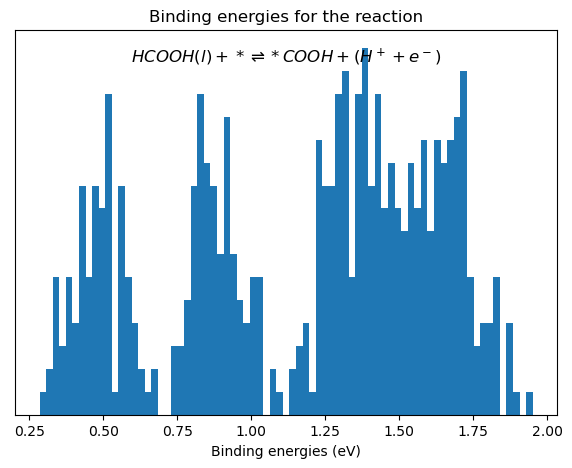

In [15]:
# I should make a plotting module that showcases a reaction
reaction_string = r"$HCOOH (l) + * \rightleftharpoons *COOH + (H^+ + e^-)$"

plot_BE(calibrated_binding_energies1, reaction_string)

### Loading binding energies of the reaction of formic acid turning into CO2
$$ *COOH \rightleftharpoons * + CO_2 (g) + (H^+ e^-) $$

In [16]:
products = {"CO2": molecules_dict["CO2"], "Slab": slab_energies}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}

# Maybe I should make another entry with the amount of H+ + e- pairs produced

reaction2 = {"products": products, "reactants": reactants}

In [17]:
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = 1, U = 0.0, AF = AF)

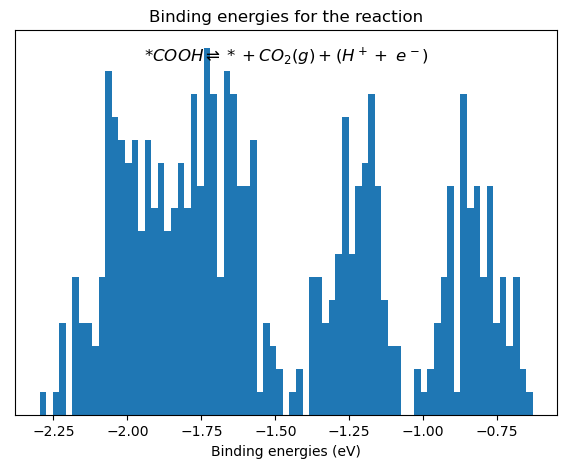

In [18]:
reaction_string = r"$*COOH \rightleftharpoons * + CO_2 (g) + (H^+ + e^-)$"
plot_BE(calibrated_binding_energies2, reaction_string)

### Reaction plots

In [19]:
# FUNCTION
def free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    HE_steps = len(reaction_strings)
    cumsum_BE = np.cumsum(calibrated_binding_energies, axis = 0)
    for idx, energies in enumerate(cumsum_BE):
        if len(energies) == 27:
            alpha = 0.50
        if len(energies) == 504:
            alpha = 0.13
        ax.scatter([idx]*len(energies), energies, s=1000, marker = "_", alpha = alpha, label = reaction_strings[idx])
    
    ax.set_title(title_string)
    #ax.set_xticks([num for num in range(HE_steps)], ["0"]+[f"+{num}"+r"$(H^++ e^-)$" for num in range(1, HE_steps)])
    ax.set_xticks([num for num in range(len(He_trans)+1)], ["0"]+[f"+{num}"+r"$(H^++ e^-)$" for num in np.cumsum(He_trans)])

    ax.set_ylabel(r"$\Delta G$")
    #ax.set_xlabel("xlabel")
    ax.set_xlim(-0.2, HE_steps-1+0.2)
    leg = plt.legend()
    for lh in leg.legendHandles:
        lh.set_alpha(1)
    #ax.legend()
    
    plt.savefig("../figures/free_energy_diagram/" + filename + ".png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()

### Two-step reaction from HCOOH to *COOH to CO2

$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

$$ *COOH \rightleftharpoons * + CO_2 (g) + (H^+ e^-) $$

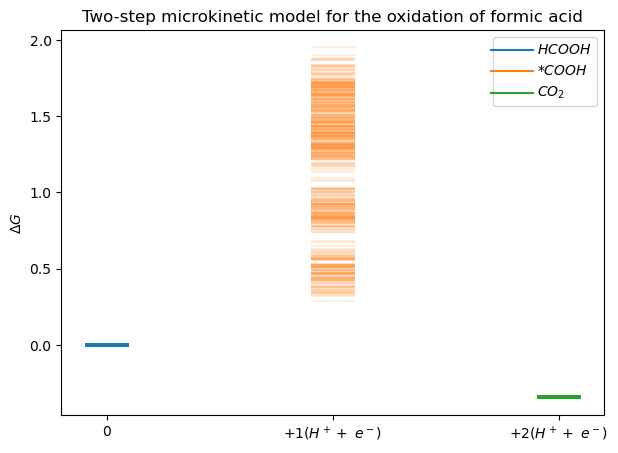

In [97]:
# Determine U
U = 0 # Volt

# Load energies
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}
reaction1 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = U, AF = AF)

products = {"CO2": molecules_dict["CO2"], "Slab": slab_energies}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reaction2 = {"products": products, "reactants": reactants}
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = 1, U = U, AF = AF)

title_string = "Two-step microkinetic model for the oxidation of formic acid"
starting_string = r"$HCOOH$"
second_string = r"$*COOH$"
third_string = r"$CO_2$"
reaction_strings = [starting_string, second_string, third_string]
calibrated_binding_energies = [np.array([0 for n in range(len(calibrated_binding_energies1))]), calibrated_binding_energies1, calibrated_binding_energies2]
He_trans = [1, 1] #How many H+ and e- are transferred for each step?
filename = "Two_step"

free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename)

### Loading a different reaction, maybe including the $^*CO_2$ step

$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

$$ *COOH \rightleftharpoons *CO_2 + (H^+ e^-) $$

$$ *CO_2 \rightleftharpoons * + CO_2 $$

So I need $*CO_2$ data before I kan continue on this reaction :(

### Three-step reaction through bidentate and monodentate (Yellow route)

$$ HCOOH (l) + * \rightleftharpoons *O*OCH + (H^+ + e^-) $$

$$ *O*OCH \rightleftharpoons *OOCH $$

$$ *OOCH \rightleftharpoons * + CO_2 (g) + (H^+ + e^-) $$

In [21]:
# Unfortunately, only the first 3 slabs (3*9 = 27 energies) are present in the monodentate data
# To solve this, I only loaded the first 27 energies

# Formic acid to bidentate
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies[0:27]}
products = {"bound_OCHO": HEA_energies["COOH_H_on_C_OO_adsorbed_out.db"][0:27]} # Bidentate
reaction1 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = 0.0, AF = AF)

# Bidentate to monodentate
reactants = {"bound_OCHO": HEA_energies["COOH_H_on_C_OO_adsorbed_out.db"][0:27]} # Bidentate
products = {"bound_OCHO": HEA_energies["COOH_O_adsorbed_out.db"]}  # Monodentate
reaction2 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = 0, U = 0.0, AF = AF)

# monodentate to CO2 (g)
reactants = {"bound_OCHO": HEA_energies["COOH_O_adsorbed_out.db"]} # Monodentate
products = {"CO2": molecules_dict["CO2"], "Slab": slab_energies[0:27]}  # free CO2 + slab
reaction3 = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing
calibrated_binding_energies3 = binding_energy_reaction(reaction = reaction3, n_HE = 1, U = 0.0, AF = AF)

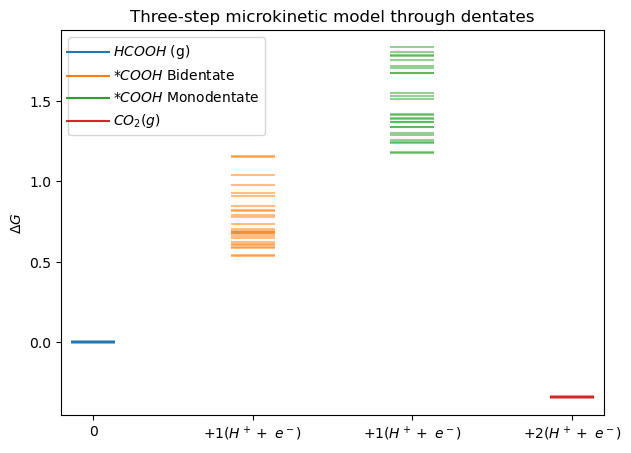

In [23]:
title_string = "Three-step microkinetic model through dentates"
starting_string = r"$HCOOH$ (g)"
second_string = r"$*COOH$ Bidentate"
third_string = r"$*COOH$ Monodentate"
fourth_string = r"$CO_2 (g)$"
reaction_strings = [starting_string, second_string, third_string, fourth_string]
calibrated_binding_energies = [np.array([0 for n in range(len(calibrated_binding_energies1))]), calibrated_binding_energies1, calibrated_binding_energies2, calibrated_binding_energies3]
He_trans = [1, 0, 1] #How many H+ and e- are transferred for each step?
filename = "Dentates"
free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename)

## Reactions that result in bound carbon monoxide

### H on the side-reaction

$$ HCOOH (l) + * \rightleftharpoons ^*COOH + (H^+ + e^-)$$

$$ * + ^*COOH + (H^+ + e^-) \rightleftharpoons ^*COOH + ^*H $$

$$ ^*COOH + ^*H \rightleftharpoons ^*CO + H_2O $$

It looks like I'll have to wait with this one until I have made binding energy prediction models for all species

In [ ]:
# Determine U
U = 0 # Volt

# Load energies
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}
reaction1 = {"products": products, "reactants": reactants}
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = U, AF = AF)

# We will try handling *COOH and *H independantly
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"], "bound_H": HEA_energies["H_out.db"]}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"], "H_slab": HEA_energies["slabs_out.db"]}
reaction2 = {"products": products, "reactants": reactants}
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = -1, U = U, AF = AF)

title_string = "Two-step microkinetic model for the oxidation of formic acid"
starting_string = r"$HCOOH$"
second_string = r"$*COOH$"
third_string = r"$CO_2$"
reaction_strings = [starting_string, second_string, third_string]
calibrated_binding_energies = [np.array([0 for n in range(len(calibrated_binding_energies1))]), calibrated_binding_energies1, calibrated_binding_energies2]
He_trans = [1, 1] #How many H+ and e- are transferred for each step?
filename = "Two_step"

#free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename)

### CO$_2$RR at the end-reaction

$$ HCOOH (l) + * \rightleftharpoons *COOH + (H^+ e^-) $$

$$ *COOH \rightleftharpoons * + CO_2 (g) + (H^+ e^-) $$

$$ * + CO_2 (g) + 2(H^+ e^-) \rightleftharpoons ^*CO + H_2O $$

This one I have the data for, so no need for energy prediction models (yet)

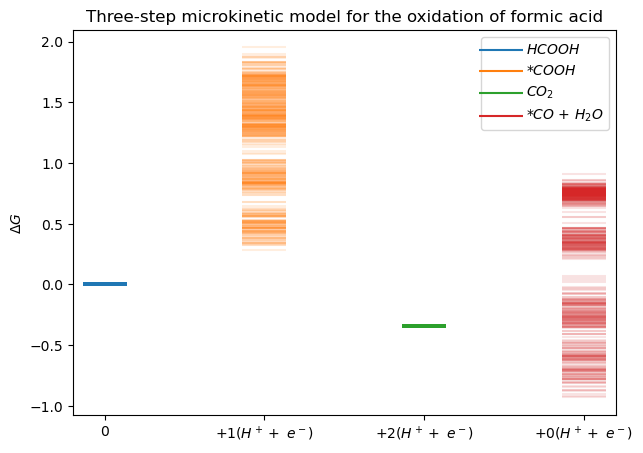

In [102]:
# Determine U
U = 0 # Volt

# Load energies
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}
reaction1 = {"products": products, "reactants": reactants}
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = U, AF = AF)

products = {"CO2": molecules_dict["CO2"], "Slab": slab_energies}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reaction2 = {"products": products, "reactants": reactants}
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = 1, U = U, AF = AF)

products = {"H2O": molecules_dict["H2O"], "bound_CO": HEA_energies["CO_out.db"]}
reactants = {"CO2": molecules_dict["CO2"], "Slab": slab_energies}
reaction3 = {"products": products, "reactants": reactants}
calibrated_binding_energies3 = binding_energy_reaction(reaction = reaction3, n_HE = -2, U = U, AF = AF)

title_string = "Three-step microkinetic model for the oxidation of formic acid"
starting_string = r"$HCOOH$"
second_string = r"$*COOH$"
third_string = r"$CO_2$"
fourth_string = r"$*CO$ + $H_2O$"
reaction_strings = [starting_string, second_string, third_string, fourth_string]
calibrated_binding_energies = [np.array([0 for n in range(len(calibrated_binding_energies1))]), calibrated_binding_energies1, calibrated_binding_energies2, calibrated_binding_energies3]
He_trans = [1, 1, -2] #How many H+ and e- are transferred for each step?
filename = "CO2RR_at_the_end"

free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename)

### H from solution-reaction

$$ HCOOH (l) + * \rightleftharpoons ^*COOH + (H^+ + e^-) $$

$$ ^*COOH + (H^+ + e^-) \rightleftharpoons ^*CO + H_2O $$

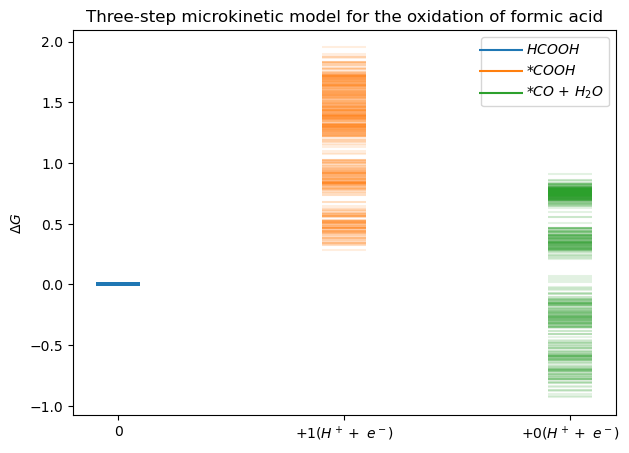

In [106]:
# Determine U
U = 0 # Volt

# Load energies
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}
reaction1 = {"products": products, "reactants": reactants}
calibrated_binding_energies1 = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = U, AF = AF)

products = {"bound_CO": HEA_energies["CO_out.db"], "H2O": molecules_dict["H2O"]}
reactants = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reaction2 = {"products": products, "reactants": reactants}
calibrated_binding_energies2 = binding_energy_reaction(reaction = reaction2, n_HE = -1, U = U, AF = AF)

title_string = "Three-step microkinetic model for the oxidation of formic acid"
starting_string = r"$HCOOH$"
second_string = r"$*COOH$"
third_string = r"$*CO$ + $H_2O$"

reaction_strings = [starting_string, second_string, third_string]
calibrated_binding_energies = [np.array([0 for n in range(len(calibrated_binding_energies1))]), calibrated_binding_energies1, calibrated_binding_energies2]
He_trans = [1, -1] #How many H+ and e- are transferred for each step?
filename = "H_from_solution"

free_e_diagram(reaction_strings, calibrated_binding_energies, title_string, He_trans, filename)

### CO-OH slide-reaction

$$ HCOOH (l) + * \rightleftharpoons ^*COOH + (H^+ + e^-) $$

$$ * + ^*COOH \rightleftharpoons ^*CO + ^*OH $$

## Activity estimation (via Current Density)

#### Finding per-site current

#### Diffusion-limiting the per-site current with the Koutecký-Levich equation

In [37]:
def estimate_activity(dG, U, j_D):
    # Constants
    k = 1
    kBT_eV = 0.025692508388298233
    
    # DeltaG_RLS
    dG_RLS = np.abs(dG + 0.1728) - 0.1728 - U
    
    #Arrhenius equation
    j_i = k * np.exp(-dG_RLS / kBT_eV)
    
    j = np.average(1 /(1/j_i + 1/j_D))
    return j

## Little test
#dG_array = np.array([-0.17, -0.18, -0.1, -0.2])
#estimate_activity(dG = dG_array, U = 0, j_D = 1)

In [ ]:
dG_SE_list = calibrated_binding_energies_SE = binding_energy_reaction(reaction = reaction1_SE, n_HE = 1, U = U, AF = AF)
dG_SE_noise = add_noise(dG_SE_list)

### Estimating the activity based on purely the DFT data

#### Choose the voltage-range and diffusion current limit

In [84]:
U_list = np.linspace(0, 1.5, 200)

In [85]:
# Loading HEA energies
products = {"bound_COOH": HEA_energies["COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": slab_energies}
reaction_COOH_ads_HEA = {"products": products, "reactants": reactants}
dG_HEA_list = np.array([binding_energy_reaction(reaction = reaction_COOH_ads_HEA, n_HE = 1, U = U, AF = AF) for U in U_list])

In [86]:
# Loading the pure metals
products = {"bound_COOH": SE_energies["single_element_COOH_C_adsorbed_out.db"]}
reactants = {"HCOOH": molecules_dict["CH2O2"], "Slab": SE_slab_energies}
reaction_COOH_ads_SE = {"products": products, "reactants": reactants} # Carry on putting information into the reaction thing
dG_SE_list = np.array([binding_energy_reaction(reaction = reaction_COOH_ads_SE, n_HE = 1, U = U, AF = AF) for U in U_list]).T

#### Use the estimate_activity function for energies at each voltage

In [87]:
# HEA activities #
j_HEA = [estimate_activity(energies, U, j_D = 1) for (energies, U) in zip(dG_HEA_list, U_list)]

# SINGLE ELEMENT activities #
j_SE_AG = [estimate_activity(energies, U, j_D = 1) for (energies, U) in zip(dG_SE_list[0], U_list)]

j_SE_HEA_dict = {}
for idx, element in enumerate(SE_slab_atoms):
    #print("idx:", str(element))
    j_SE_HEA_dict[element] = [estimate_activity(energies, U, j_D = 1) for (energies, U) in zip(dG_SE_list[idx], U_list)]

# Add HEA to the dictionary
j_SE_HEA_dict["HEA"] = j_HEA

#### Plot the polarization curve

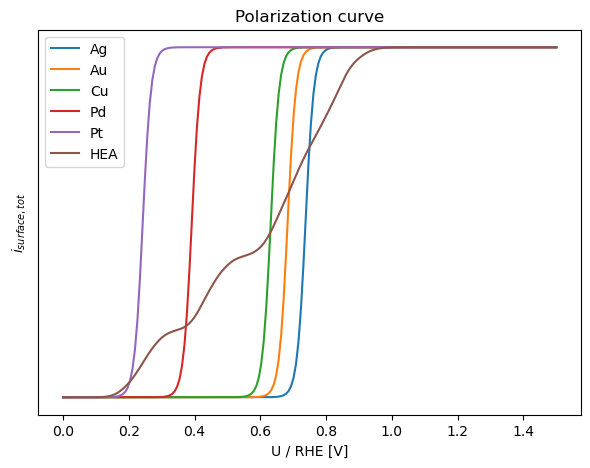

In [88]:
def polarization_curve(U_list, j_dict):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    # Unpack the dictionary. Loop through all the keys in the dictionary.
    for label, j_list in j_dict.items():
        ax.plot(U_list, j_list, label = label)
    
    ax.set_title(f"Polarization curve")
    ax.set_yticks([])
    ax.set_ylabel(r"$i_{surface,tot}$")
    ax.set_xlabel("U / RHE [V]")
    ax.legend()
    plt.savefig("../figures/pol_curve/HEA_SE.png", dpi = 300, bbox_inches = "tight")

    plt.show()
    return None

polarization_curve(U_list, j_SE_HEA_dict)

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

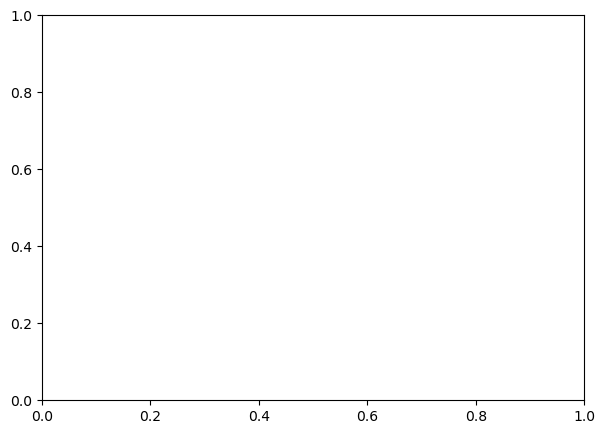

In [284]:
U_list = np.linspace(0, 1.5, 100)
j_HEA_list = []
j_SE_list = []

for U in U_list:
    dG_HEA = binding_energy_reaction(reaction = reaction1, n_HE = 1, U = U, AF = AF)
    dG_SE_list = calibrated_binding_energies_SE = binding_energy_reaction(reaction = reaction1_SE, n_HE = 1, U = U, AF = AF)
    dG_SE_noise = add_noise(dG_SE_list)
    
    for SE_energy in dG_SE_noise:
        j = Koutecky(arrhenius(SE_energy, U = U), j_D = 1)
        j_SE_list.append(j)
        
    j = Koutecky(arrhenius(dG_HEA, U = U), j_D = 1) #den her kunne have været list comprehension med (x, y).
    j_list.append(j)

def polarization_curve(U_list, j_list):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    ax.plot(U_list, j_list, label = "HEA (Ag, Au, Cu, Pd, Pt)")
    
    ax.set_title(f"Polarization curve")
    ax.set_yticks([])
    ax.set_ylabel(r"$i_{surface,tot}$")
    ax.set_xlabel("U / RHE [V]")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
polarization_curve(U_list, j_list)

In [ ]:
j_all_SE = []
for metal_Es in add_noise(calibrated_binding_energies_SE):
    j_single_metal = []
    for U in U_list:
        j = Koutecky(arrhenius(metal_Es, U = U), j_D = 1)
        j_single_metal.append(j)
    j_all_SE.append(j_single_metal) #Lav det til et dictionary, så bliver det lettere at folde ud i en plotting funktion

In [270]:
# Not needed

import random
import numpy as np

def add_noise(values): #Skrevet af ChatGPT
    """Add small noise drawn from a normal distribution to a list of values."""
    # Create an empty list to hold the noisy versions of the values
    noisy_values = []
    # Loop over each value in the input list
    for value in values:
        # Create an array of 500 values drawn from a normal distribution with mean 0 and standard deviation 0.05
        noise = np.random.normal(0, 0.05, 500)
        # Add the noise to the original value
        noisy_value = value + noise
        # Append the noisy value to the list of noisy values
        noisy_values.append(noisy_value)
    return noisy_values

add_noise(calibrated_binding_energies_SE)

[array([1.52133418, 1.46441481, 1.44758631, 1.46282002, 1.48066892,
        1.32871597, 1.43009094, 1.51296112, 1.48033611, 1.36820363,
        1.44093188, 1.4464727 , 1.43283059, 1.47259059, 1.50964457,
        1.42991497, 1.4635497 , 1.5645869 , 1.45190729, 1.49244808,
        1.43801284, 1.49484089, 1.46345486, 1.49882267, 1.46308269,
        1.49433931, 1.50792569, 1.44199145, 1.48131208, 1.45435556,
        1.50426559, 1.51402237, 1.34393389, 1.48836018, 1.52803217,
        1.47995128, 1.48644338, 1.50058571, 1.49911726, 1.43909398,
        1.47924373, 1.48241656, 1.46469088, 1.3713495 , 1.43669339,
        1.49050857, 1.49141466, 1.43917548, 1.52832688, 1.50616529,
        1.52989504, 1.43986478, 1.37857156, 1.53885944, 1.55126404,
        1.53990969, 1.53271157, 1.52679446, 1.35440692, 1.47842946,
        1.46989387, 1.49366655, 1.51669639, 1.52292596, 1.4868787 ,
        1.447986  , 1.50075246, 1.53468759, 1.47235881, 1.52792131,
        1.42683934, 1.45104141, 1.44440575, 1.51

### Not used

In [198]:
def sigmoid(dGn):
    '''Takes one energy for each reaction step energy and returns the i_site for the largest energy step'''
    kBT_eV = 0.025692508388298233
    max_dGn = np.max(dGn)
    i_site = 1 / (1 + np.exp( max_dGn / kBT_eV))
    return i_site

In [183]:
## Her skal jeg så bruge første entry i hver liste med reaction energies

np.array(calibrated_binding_energies).T

np.average([sigmoid(dGn) for dGn in np.array(calibrated_binding_energies).T])

0.9999999999949928

In [209]:
cumsum_BE = np.cumsum(calibrated_binding_energies, axis = 0)
cumsum_BE

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85412706,  1.49511488,  0.47153772, ...,  1.56466782,
         1.41513061,  0.57729254],
       [-0.3456385 , -0.3456385 , -0.3456385 , ..., -0.3456385 ,
        -0.3456385 , -0.3456385 ]])

In [210]:
-0.3456385 / 2

-0.17281925

In [197]:
np.array(calibrated_binding_energies).T

array([[ 0.        ,  0.60533594,  0.76520584, -1.71618028],
       [ 0.        ,  0.59086088,  0.80750316, -1.74400254],
       [ 0.        ,  0.67912048,  0.65998565, -1.68474463],
       [ 0.        ,  0.6114855 ,  0.76029681, -1.7174208 ],
       [ 0.        ,  0.68318311,  0.62129606, -1.65011767],
       [ 0.        ,  0.82419861,  0.96464577, -2.13448287],
       [ 0.        ,  0.53457107,  0.8563597 , -1.73656927],
       [ 0.        ,  0.54379836,  0.74765623, -1.63709309],
       [ 0.        ,  0.58848867,  0.58797377, -1.52210094],
       [ 0.        ,  0.65089557,  0.53202949, -1.52856357],
       [ 0.        ,  0.81691801,  0.59865528, -1.76121179],
       [ 0.        ,  0.66117389,  0.87129801, -1.8781104 ],
       [ 0.        ,  0.67297565,  1.03640445, -2.0550186 ],
       [ 0.        ,  0.69199243,  0.5509508 , -1.58858174],
       [ 0.        ,  0.92616777,  0.74823549, -2.02004176],
       [ 0.        ,  0.68636463,  0.57468615, -1.60668929],
       [ 0.        ,  1.

In [185]:
[np.max(dGn) for dGn in np.array(calibrated_binding_energies).T]

[0.7652058387206466,
 0.8075031566704638,
 0.6791204792697947,
 0.7602968078541323,
 0.6831831059223639,
 0.9646457692483352,
 0.8563596998404819,
 0.7476562288475179,
 0.588488669012559,
 0.6508955746436236,
 0.8169180146522415,
 0.8712980052511057,
 1.0364044460300192,
 0.6919924347863677,
 0.9261677687728813,
 0.6863646310963638,
 1.0386442347963047,
 0.8977840114771141,
 0.925384964856022,
 0.9799311305003862,
 1.1525007479736011,
 0.7066080702102049,
 0.8137146851326804,
 0.7989723397663511,
 0.9120882361074791,
 0.791441119558197,
 1.1582299890121242]

In [187]:
[1 / (1 + np.exp(- np.max(dGn) / 0.025692)) for dGn in np.array(calibrated_binding_energies).T]

[0.9999999999998839,
 0.9999999999999776,
 0.9999999999966869,
 0.9999999999998594,
 0.9999999999971716,
 1.0,
 0.9999999999999967,
 0.99999999999977,
 0.9999999998872131,
 0.9999999999900611,
 0.9999999999999845,
 0.9999999999999982,
 1.0,
 0.9999999999979925,
 0.9999999999999998,
 0.9999999999975009,
 1.0,
 0.9999999999999993,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999988636,
 0.9999999999999825,
 0.9999999999999687,
 0.9999999999999996,
 0.9999999999999583,
 1.0]

In [186]:
1 / (1 + np.exp(- 0.76 / 0.025692)) # Er det meningen at det altid skal give 1?

0.9999999999998577

In [181]:
# We will precompute kB*T in units of eV
kB = 1.3806452*10**(-23) # J/K unit
T = 25+273.15 # K unit
J_to_eV = 6.24150907*10**18
kB*T*J_to_eV

0.025692508388298233

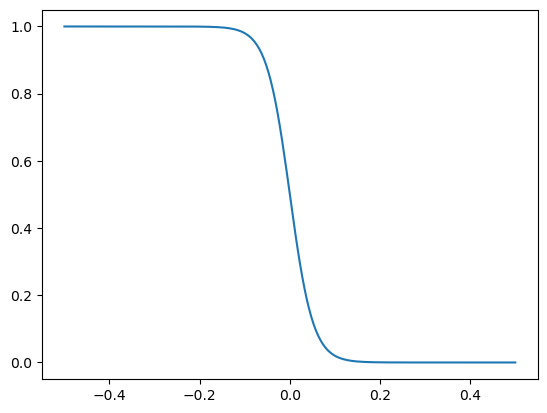

In [199]:
plt.plot(np.linspace(-0.5, 0.5, 200), [sigmoid(n) for n in np.linspace(-0.5, 0.5, 200)])
plt.show()

In [191]:
sigmoid(np.linspace(-2, 2, 200))

1.0

In [ ]:
# Lav en automatisk "Save to figures folder" ting i plotte-tingene, så jeg kan se dem på GitHub Mobile

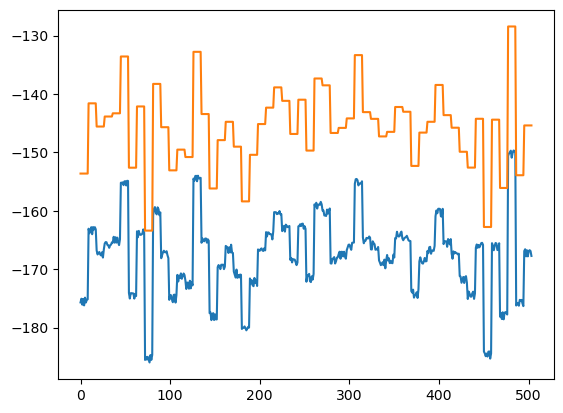

In [20]:
# The slab_energies and HEA energies match up! Yay!
plt.plot(HEA_energies["COOH_C_adsorbed_out.db"])
plt.plot(slab_energies)
plt.show()

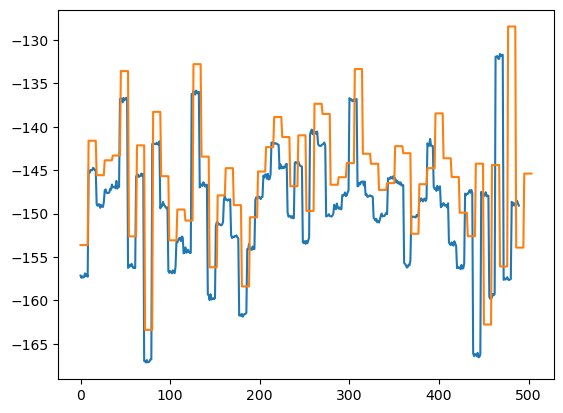

In [90]:
# The slab_energies and HEA energies match up! Yay!
plt.plot(HEA_energies["H_out.db"])
plt.plot(slab_energies)
plt.show()

In [91]:
print(len(HEA_energies["H_out.db"]))

490


### Plotting energies (No corrections)

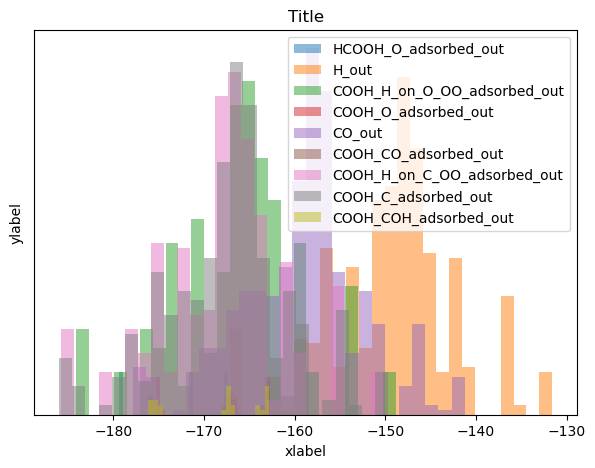

In [62]:
def plot_something(energy_dict):
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    for key in energy_dict.keys():
        if key  
        ax.hist(energy_dict[key], label = f"{key}"[:-3], bins=25, alpha = 0.5)
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something(HEA_energies)

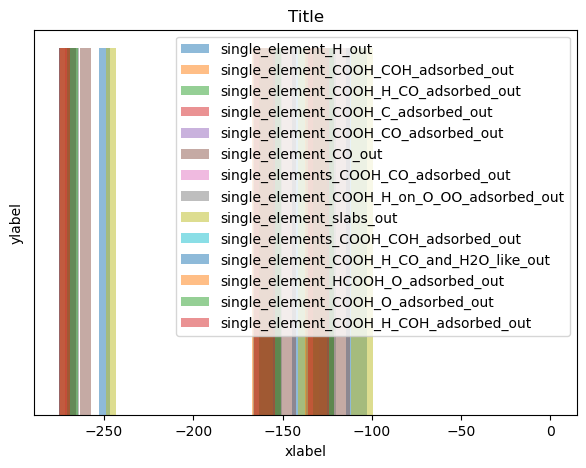

In [63]:
plot_something(SE_energies)

In [52]:
HEA_energies.keys()

dict_keys(['HCOOH_O_adsorbed_out.db', 'H_out.db', 'COOH_H_on_O_OO_adsorbed_out.db', 'COOH_O_adsorbed_out.db', 'CO_out.db', 'COOH_CO_adsorbed_out.db', 'COOH_H_on_C_OO_adsorbed_out.db', 'COOH_C_adsorbed_out.db', 'COOH_COH_adsorbed_out.db'])

### Fiddling with ase.db

In [48]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select("energy"):
    print(row)
    energy_list.append(row.energy)

<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag5Au7Cu10Pd12Pt11CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_idx>
<AtomsRow: formula=Ag13Au5Cu12Pd7Pt8CH2O2, keys=idx,slab_idx,site_id

In [40]:
Dbong = connect(formic_acid_data_path + HAE_dbs[0])
energy_list = []
for row in Dbong.select():
    #print(row.formula) #De keys man kan se med ase db er: id|age|user|formula|calculator|energy|natoms|fmax|pbc|volume|charge|mass|magmom
    print(Dbong.get_atoms(row.id))
    energy_list.append(row.energy)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))
Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123

In [38]:
Dbong.get_atoms(2)

Atoms(symbols='CuPdCuAuPdPt2CuAuPdAuPdPtPdAuAgPt2AuPtPdCuAgPd2AgPdPtAuCuPdAuAgPt2CuPdCuPtCuPtAgPdCu2OCOH2', pbc=[True, True, False], cell=[[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), calculator=SinglePointCalculator(...))

In [37]:
Dbong.get_atoms(2).cell

Cell([[8.231123626854087, 0.0, 0.0], [4.1155618134270435, 7.128362162545943, 0.0], [0.0, 0.0, 28.96091239802638]])

### Plotting template

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


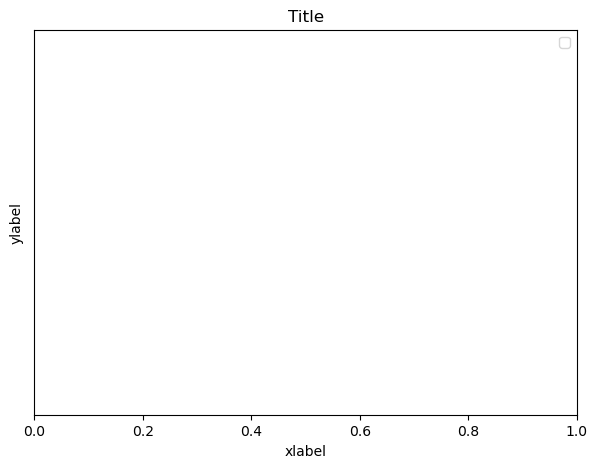

In [49]:
def plot_something():
    fig, ax = plt.subplots(1, 1, figsize = (7, 5))
    
    ax.set_title(f"Title")
    ax.set_yticks([])
    ax.set_ylabel("ylabel")
    ax.set_xlabel("xlabel")
    ax.legend()
    #plt.savefig("../figures/CV/combined_voltammogram.png", dpi = 300, bbox_inches = "tight")
    #fig.show()
    plt.show()
    return None
    
plot_something()